<a href="https://colab.research.google.com/github/mabushii68/AI_Class/blob/main/AAME_RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AAME.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [5]:
# 컬렴명 확인
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [17]:
X=df.drop('Open',axis=1)

X.head()

,Date,High,Low,Close
0,1980-03-17,4.05,3.85,3.85
1,1980-03-18,4.00,3.80,3.80
2,1980-03-19,4.05,3.85,3.85
3,1980-03-20,4.00,3.80,3.80
4,1980-03-21,3.95,3.75,3.75


In [18]:
y=df['Open']
y.value_counts()

,count
Open,
0.000000,1572
2.000000,296
2.125000,237
3.000000,220
1.875000,197
...,...
6.800000,1
3.046875,1
4.260000,1


In [19]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data) - window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

seq_data = []
for i in np.arange(0,1000):
  seq_data += [[np.sin( np.pi * i* 0.01 )]]
X,y = make_sample(seq_data, 10)

In [20]:
model = Sequential()

model.add(SimpleRNN(10,input_shape=(10,1),activation='tanh'))
model.add(Dense(1,activation='tanh'))

model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0247
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoc

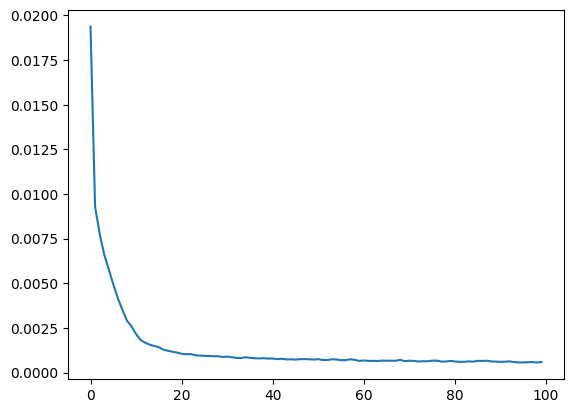

In [21]:
history = model.fit(X,y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.show()

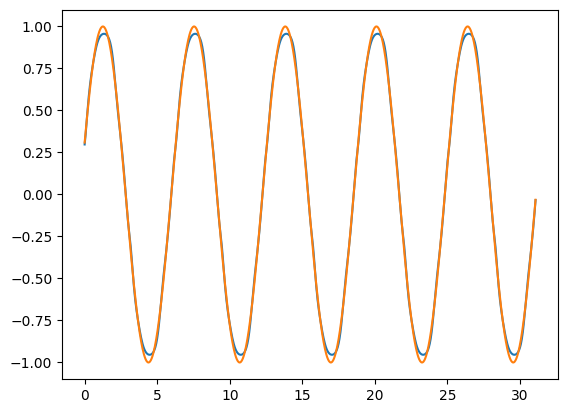

In [23]:
seq_data = []
for i in np.arange(0,1000):
  seq_data += [[np.sin( np.pi * i* 0.01 )]]
X,y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)
plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred)
plt.plot(np.pi * np.arange(0, 990)*0.01, y)

plt.show()